0    9900
1     100
dtype: int64


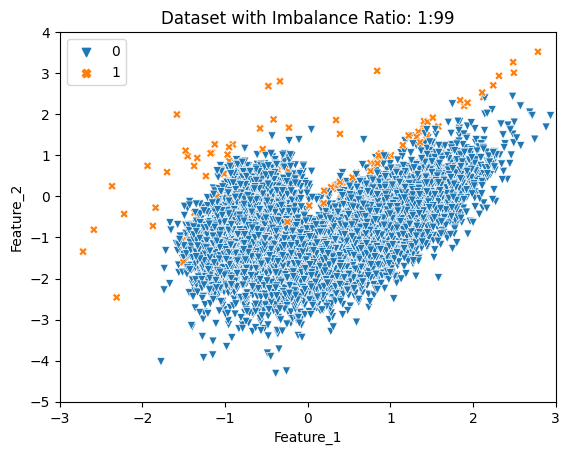

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.datasets import make_classification
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

def plot_dataset(X, y, label):
    X = pd.DataFrame(X, columns = ["Feature_1", "Feature_2"])
    y = pd.Series(y)

    print(y.value_counts())

    markers = {1: "X", 0: "v"}
    sns.scatterplot(
        data = X, 
        x = "Feature_1", y = "Feature_2", 
        hue = y, 
        style = y, 
        markers = markers
    )

    plt.title(label)
    plt.ylim(-5, 4)
    plt.xlim(-3, 3)

    plt.show()
    
    
    
X, y = make_classification(
    n_samples = 10000,
    n_features = 2,
    n_redundant = 0,
    n_classes = 2,
    flip_y = 0,
    n_clusters_per_class = 2,
    class_sep = 0.79,
    weights = [0.99],
    random_state = 81,
)

plot_dataset(X, y, "Dataset with Imbalance Ratio: 1:99")

###  InstanceHardnessThreshold :

`InstanceHardnessThreshold` is a machine learning technique used for handling imbalanced datasets. It assesses the hardness or difficulty of instances in the dataset and selectively removes instances from the majority class that are considered difficult to classify accurately. This method aims to improve the quality of the training dataset by eliminating potentially problematic examples, thereby enhancing the generalization and performance of machine learning models, especially in scenarios with imbalanced class distributions. The hardness of instances is determined based on a predefined threshold, and only instances surpassing this threshold are removed during the process.

Resampled dataset shape Counter({0: 100, 1: 100})
0    100
1    100
dtype: int64


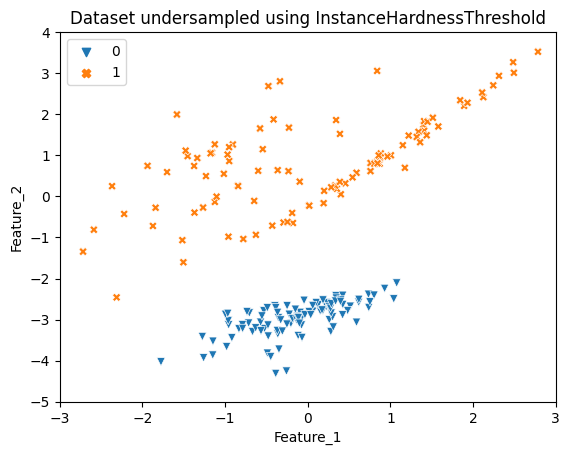

In [2]:
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.linear_model import LogisticRegression

nm = InstanceHardnessThreshold(
    random_state=0, sampling_strategy="auto", estimator=LogisticRegression()
)
X_res, y_res = nm.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

plot_dataset(X_res, y_res, "Dataset undersampled using InstanceHardnessThreshold")